<a href="https://colab.research.google.com/github/bscoder9595/gittest/blob/main/bahw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import powerlaw
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

With the help of a computer, generate a network with N = 10^4 nodes 
using the Barabási-Albert model with m = 4. Use as initial condition a fully 
connected network with m = 4 nodes.


Number of nodes: 10000
Number of edges: 39990
Average degree: 8.00


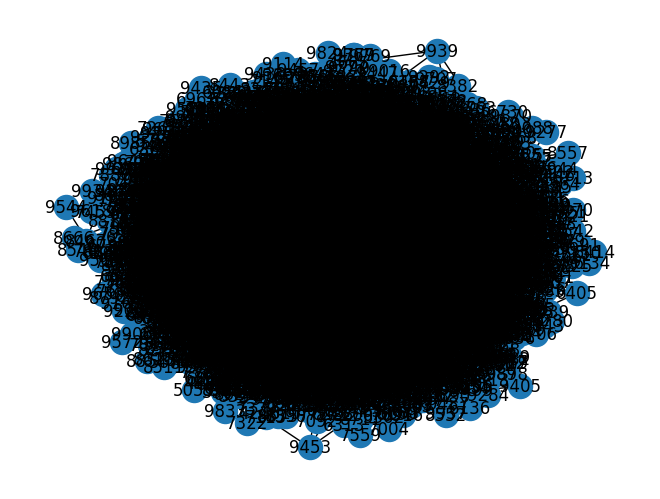

In [5]:


# Create initial fully connected graph with m = 4 nodes
m = 4
init_graph = nx.complete_graph(m)

# Generate BA model graph with N = 10^4 nodes and m = 4
N = 10**4
ba_graph = nx.barabasi_albert_graph(N, m, seed=0, initial_graph=init_graph)


# Print some information about the resulting graph
print("Number of nodes",ba_graph.number_of_nodes())
print("Number of edges",ba_graph.number_of_edges())
print("Average degree:", sum(dict(ba_graph.degree()).values()) / N:.2f)


nx.draw(ba_graph, with_labels=True)

# show the plot
#plt.show()

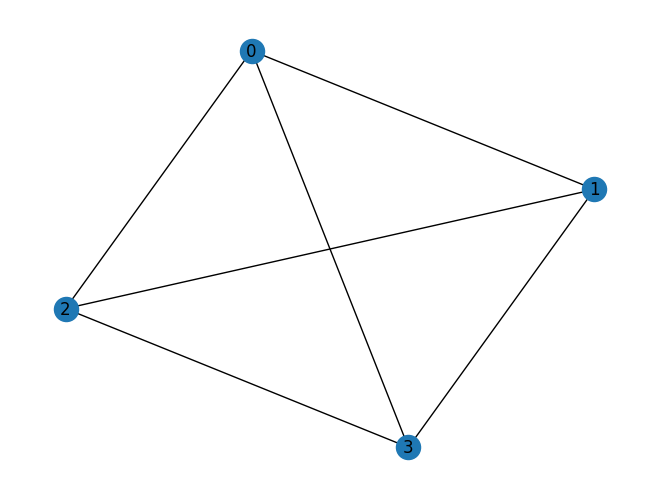

In [6]:
nx.draw(init_graph, with_labels=True)


(a) Measure the degree distribution at intermediate steps, namely 
when the network has 10^2, 10^3 and 10^4 nodes.

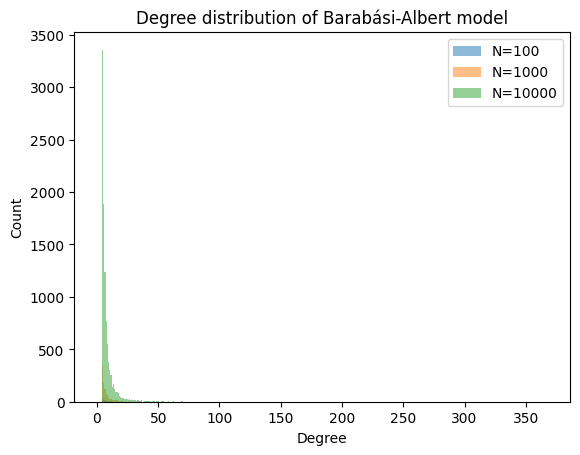

In [7]:
steps = [10**2,10**3,10**4]
for step in steps:
    subgraph = ba_graph.subgraph(range(step))
    degrees = [d for n, d in subgraph.degree()]
    #plt.hist(degrees, bins=50, alpha=0.5, label=f"N={step}")
    plt.hist(degrees, bins=range(max(degrees)+2), alpha=0.5, label=f"N={step}")
    
plt.title("Degree distribution of Barabási-Albert model")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.legend()
plt.show()

    

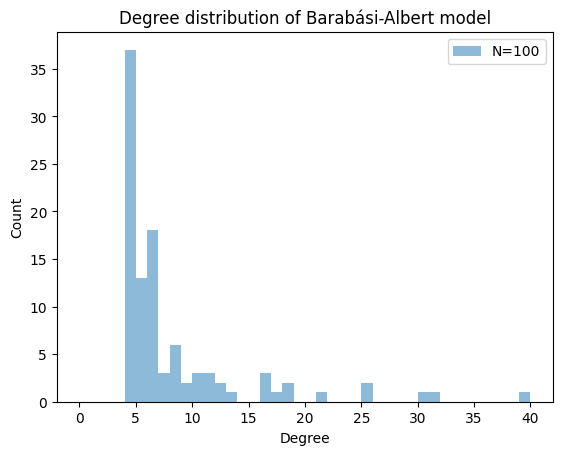

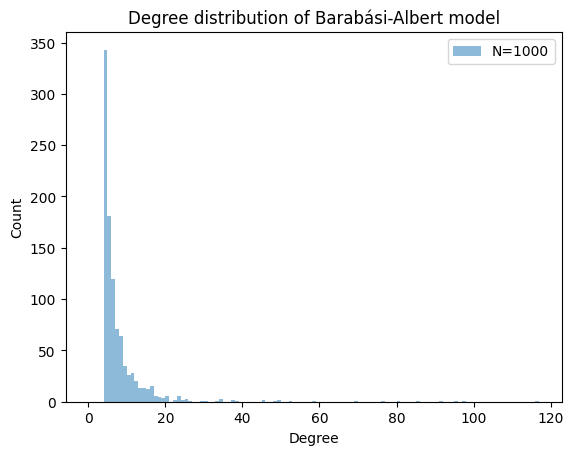

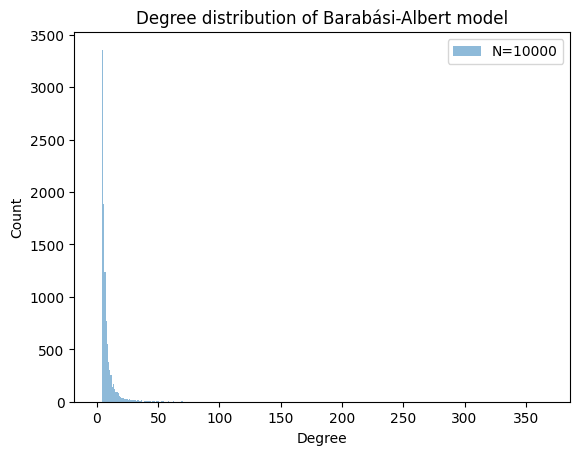

In [8]:
steps = [10**2,10**3,10**4]
for step in steps:
    subgraph = ba_graph.subgraph(range(step))
    degrees = [d for n, d in subgraph.degree()]
    #plt.hist(degrees, bins=50, alpha=0.5, label=f"N={step}")
    plt.hist(degrees, bins=range(max(degrees)+2), alpha=0.5, label=f"N={step}")
    
    plt.title("Degree distribution of Barabási-Albert model")
    plt.xlabel("Degree")
    plt.ylabel("Count")
    plt.legend()
    plt.show()

    







(b) Compare the distributions at these intermediate steps by plot-
ting them together and fitting each to a power-law with degree 
exponent γ. Do the distributions "converge"?

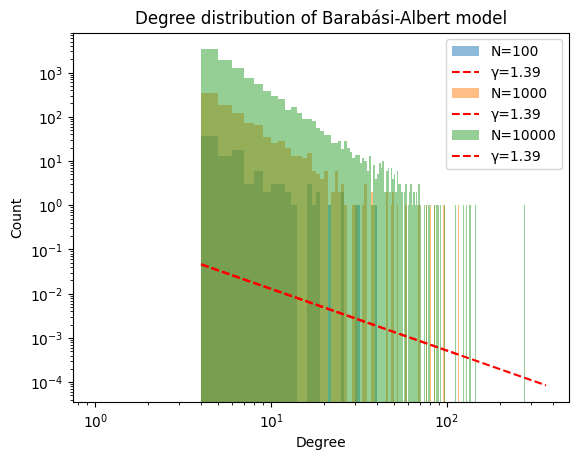

In [9]:
for step in steps:
    subgraph = ba_graph.subgraph(range(step))
    degrees = [d for n, d in subgraph.degree()]

    # Fit power-law to degree distribution
    fit = powerlaw.Fit(degrees, xmin=1, discrete=True)
    gamma = fit.power_law.alpha

    # Plot degree distribution and power-law fit
    plt.hist(degrees, bins=range(max(degrees)+2), alpha=0.5, label=f"N={step}")
    fit.power_law.plot_pdf(color='r', linestyle='--', label=f"γ={gamma:.2f}")


plt.title("Degree distribution of Barabási-Albert model")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.legend()
plt.show()

 distributions do not "converge" in the sense that they do not become identical as the number of nodes increases

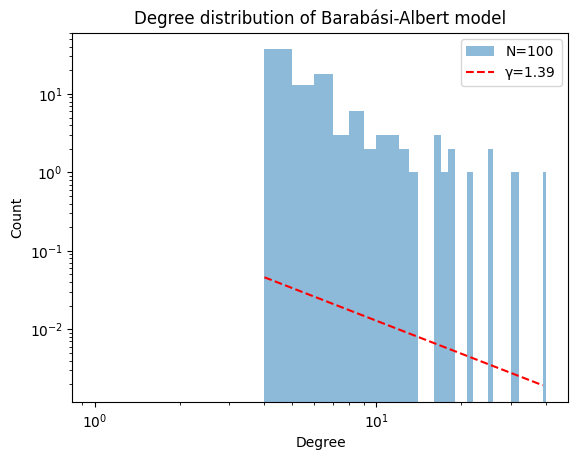

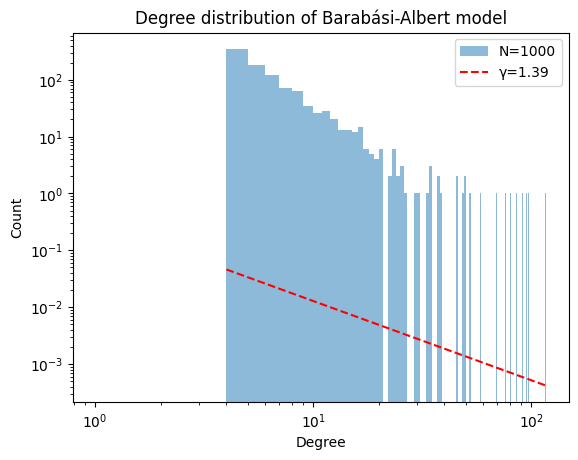

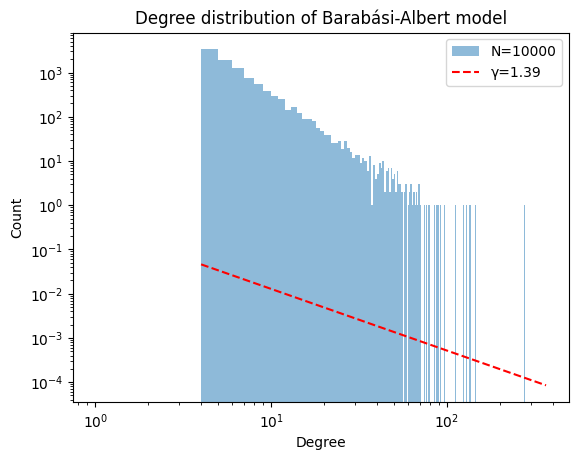

In [10]:
for step in steps:
    subgraph = ba_graph.subgraph(range(step))
    degrees = [d for n, d in subgraph.degree()]

    # Fit power-law to degree distribution
    fit = powerlaw.Fit(degrees, xmin=1, discrete=True)
    gamma = fit.power_law.alpha

    # Plot degree distribution and power-law fit
    plt.hist(degrees, bins=range(max(degrees)+2), alpha=0.5, label=f"N={step}")
    fit.power_law.plot_pdf(color='r', linestyle='--', label=f"γ={gamma:.2f}")

    # Plot degree distribution and power-law fits
    plt.title("Degree distribution of Barabási-Albert model")
    plt.xlabel("Degree")
    plt.ylabel("Count")
    plt.legend()
    plt.show()

(c) Plot together the cumulative degree distributions at intermedi-
ate steps.

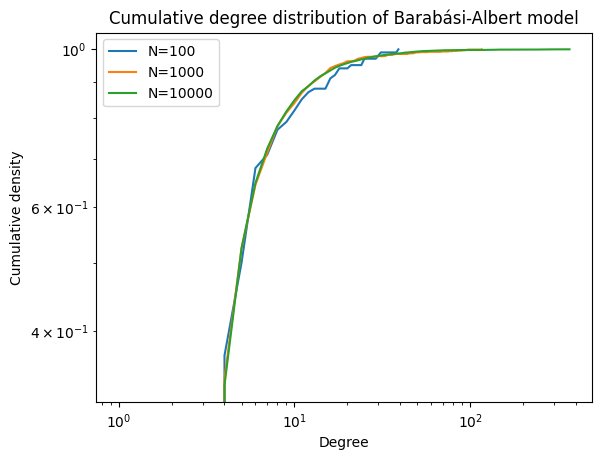

In [11]:
for step in steps:
    subgraph = ba_graph.subgraph(range(step))
    degrees = [d for n, d in subgraph.degree()]
    degree_counts, degree_bins = np.histogram(degrees, bins=range(max(degrees)+2), density=True)
    degree_cdf = np.cumsum(degree_counts)
    plt.plot(degree_bins[:-1], degree_cdf, label=f"N={step}")

# Plot cumulative degree distribution
plt.title("Cumulative degree distribution of Barabási-Albert model")
plt.xlabel("Degree")
plt.ylabel("Cumulative density")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

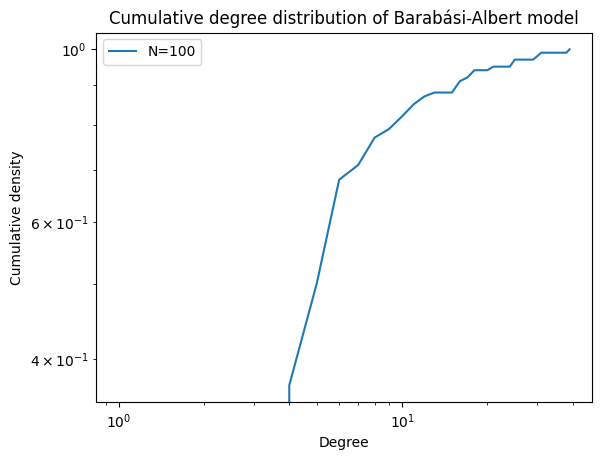

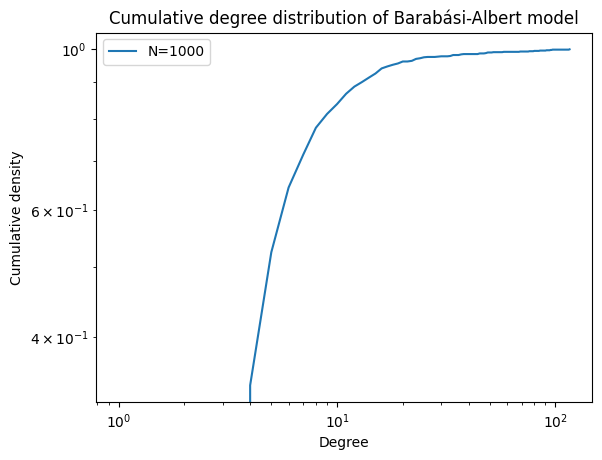

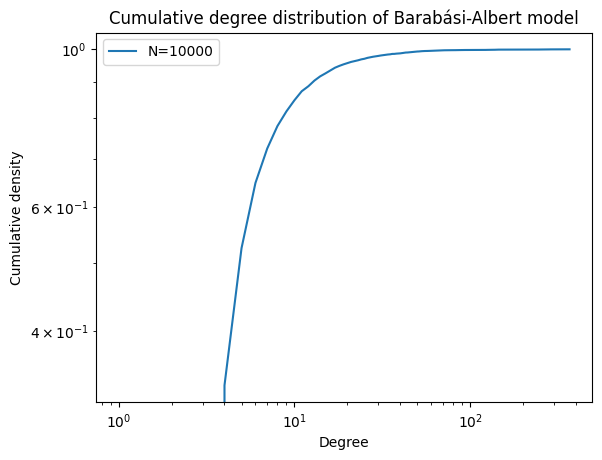

In [12]:
for step in steps:
    subgraph = ba_graph.subgraph(range(step))
    degrees = [d for n, d in subgraph.degree()]
    degree_counts, degree_bins = np.histogram(degrees, bins=range(max(degrees)+2), density=True)
    degree_cdf = np.cumsum(degree_counts)
    plt.plot(degree_bins[:-1], degree_cdf, label=f"N={step}")

    # Plot cumulative degree distribution
    plt.title("Cumulative degree distribution of Barabási-Albert model")
    plt.xlabel("Degree")
    plt.ylabel("Cumulative density")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.show()

(d) Measure the average clustering coefficient in function of N.

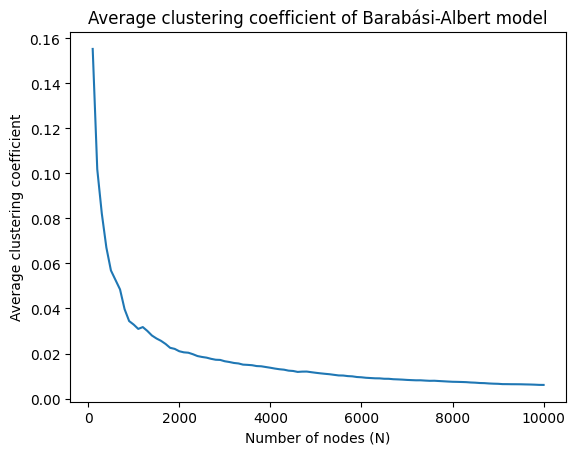

In [13]:
# Define parameters
N_min = 10**2
N_max = 10**4
m = 4

# Measure average clustering coefficient for each N
N_values = range(N_min, N_max+1, 100)
cc_values = []
for N in N_values:
    ba_graph = nx.barabasi_albert_graph(N, m, seed=0)
    cc = nx.average_clustering(ba_graph)
    cc_values.append(cc)

# Plot average clustering coefficient as a function of N
plt.plot(N_values, cc_values)
plt.title("Average clustering coefficient of Barabási-Albert model")
plt.xlabel("Number of nodes (N)")
plt.ylabel("Average clustering coefficient")
plt.show()

this code is not mine and i didn`t write by myself

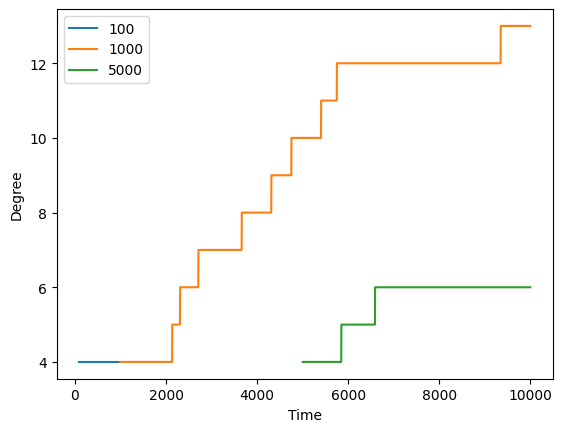

In [18]:


# Choose a node to track
node_to_track = 0

# Define the times at which to measure the degree
times  = list(range(1, 200, 2))

# Measure the degree at the selected times
degrees = []
for time in times:
    subgraph = ba_graph.subgraph([i for i in range(time+1)])
    degrees.append(subgraph.degree(node_to_track))

node_to_track1 = 100
times1  = list(range(100, 1000, 2))
degrees1 = []
for time in times1:
    subgraph = ba_graph.subgraph([i for i in range(time+1)])
    degrees1.append(subgraph.degree(node_to_track1))


node_to_track2 = 1000
times2  = list(range(1000, 10000, 2))
degrees2 = []
for time in times2:
    subgraph = ba_graph.subgraph([i for i in range(time+1)])
    degrees2.append(subgraph.degree(node_to_track2))


node_to_track3 = 5000
times3  = list(range(5000, 10000,2 ))
degrees3 = []
for time in times3:
    subgraph = ba_graph.subgraph([i for i in range(time+1)])
    degrees3.append(subgraph.degree(node_to_track3))





# Plot the degree dynamics

plt.plot(times1, degrees1,label='100')
plt.plot(times2, degrees2,label='1000')
plt.plot(times3, degrees3,label='5000')

plt.xlabel('Time')
plt.ylabel('Degree')
plt.legend()
plt.show()